### Source code

In [63]:
import numpy as np
from calendar import isleap
import datetime as dt


class WindGenerator(object):
    def __init__(self, init_date, delta_t, np_random, p_max=1.):
        self.np_random = np_random
        self.p_max = p_max
        self.date = init_date
        self.delta_t = delta_t
        self.p = 0.
        self.noise_factor = 0.15

    def __iter__(self):
        return self

    def __next__(self):
        yearly_factor = self._yearly_pattern()

        # Add random noise sampled from N(0, 1).
        noise = self.noise_factor * self.np_random.normal(0., scale=1.)
        self.p = yearly_factor + noise

        # Make sure that P stays within [0, 1].
        self.p = self.p if self.p > 0. else 0.
        self.p = self.p if self.p < 1. else 1.

        # Save next real power generation.
        self.p_injection = self.p * self.p_max

        # Increment the date.
        self.date += self.delta_t

        return self.p_injection

    def next(self):
        return self.__next__()

    def _yearly_pattern(self):
        """
        Return a factor to scale wind generation, based on the time of the year.

        This function returns a factor in [0.25, 0.75] used to scale the wind
        power generation curves, based on the time of the year, following a
        simple sinusoid. The base hour=0 represents 12:00 a.m. on January,
        1st. The sinusoid is designed to return its minimum value on the
        Summer Solstice and its maximum value on the Winter one.

        :return: a wind generation scaling factor in [0, 1].
        """

        # Shift hour to be centered on December, 22nd (Winter Solstice).
        since_1st_jan = (self.date - dt.datetime(self.date.year, 1, 1))
        delta_hour = since_1st_jan.days * 24 + since_1st_jan.seconds // 3600

        h = delta_hour + 240
        T = 24 * (365 + isleap(self.date.year))

        return 0.25 * np.cos(h * 2 * np.pi / T) + 0.5

In [64]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [65]:
P_max = [10, 20]
winds = []
init_date = dt.datetime(2019, 1, 1)
delta_t = dt.timedelta(minutes=15)
np_random = np.random.RandomState(2019)

for p_max in P_max:
    new_wind = WindGenerator(init_date, delta_t, np_random, p_max)
    winds.append(new_wind)

### Display curves generated by solar panels over the same period

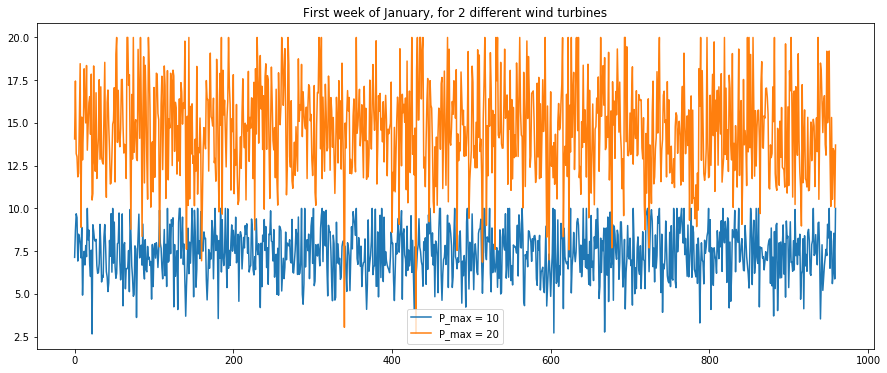

In [66]:
plt.figure(figsize=(15, 6))
for i, wind in enumerate(winds):
    series = []
    for _ in range(4*24*10):
        series.append(next(wind))
    plt.plot(series, label=f'P_max = {P_max[i]}')
plt.title('First week of January, for 2 different wind turbines')
plt.legend()

### Display curves generated at different times of the year.

In [67]:
p_max = 10
wind_months = []
for month in [1, 2, 3]:
    init_date = dt.datetime(2019, month, 1)
    new_wind = WindGenerator(init_date, delta_t, np_random, p_max)
    wind_months.append(new_wind)

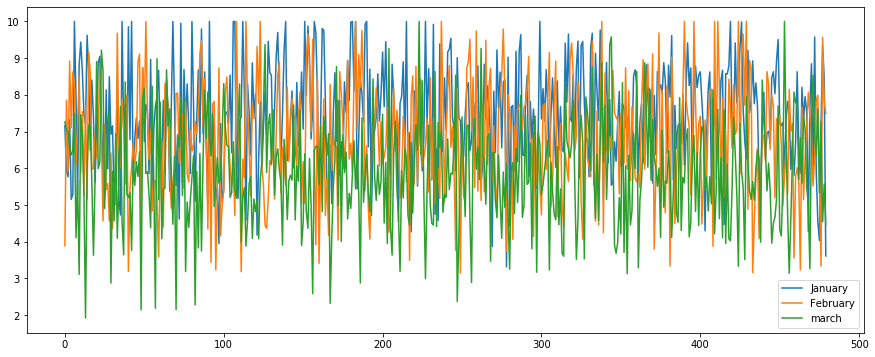

In [68]:
plt.figure(figsize=(15, 6))
months = ['January', 'February', 'march']
for i, wind in enumerate(wind_months):
    series = []
    for _ in range(4*24*5):
        series.append(next(wind))
    plt.plot(series, label=months[i])
plt.title('')
plt.legend()